In [1]:
pip install yfinance

In [2]:
# ----------------- Import Required Libraries -----------------

# Numerical and Data Handling
import numpy as np                          # For numerical operations
import pandas as pd                         # For data manipulation using DataFrames

# Data Source
import yfinance as yf                       # To download stock market data from Yahoo Finance

# Visualization
import matplotlib.pyplot as plt             # For basic plotting
import seaborn as sns                       # For attractive statistical visualizations

# Machine Learning Models and Tools
from sklearn.model_selection import train_test_split  # For splitting the dataset
from sklearn.preprocessing import StandardScaler      # For scaling features
from sklearn.linear_model import LinearRegression     # Linear Regression model
from sklearn.linear_model import Ridge, Lasso         # Ridge and Lasso Regression
from sklearn.svm import SVR                           # Support Vector Regression
from sklearn.metrics import mean_squared_error, r2_score  # Model performance evaluation

# Date handling
from datetime import datetime                         # For date formatting and operations


In [22]:
# ----------------- Load Data Based on Stock Code -----------------

# Get stock ticker from user
stocks = input("Enter the code of the stock (e.g., AAPL, RELIANCE.NS, NG=F): ")

# Download 1 year of historical data
data = yf.download(stocks, start="2008-01-01", end="2021-01-18", auto_adjust=True)

# Drop rows with any missing values (for safety)
data.dropna(inplace=True)

# Display the first few rows (adjust as needed)
print("\n📊 Preview of Downloaded Stock Data:")
display(data.head(3282))  # You can change 10 to 3256 if you want to try to view that many rows


Enter the code of the stock (e.g., AAPL, RELIANCE.NS, NG=F): NG=F


[*********************100%***********************]  1 of 1 completed


📊 Preview of Downloaded Stock Data:


Price,Close,High,Low,Open,Volume
Ticker,NG=F,NG=F,NG=F,NG=F,NG=F
Date,,,,,
2008-01-02,7.850,7.876,7.564,7.572,68553
2008-01-03,7.674,7.980,7.610,7.873,72742
2008-01-04,7.841,7.859,7.500,7.652,61496
2008-01-07,7.879,7.940,7.701,7.803,56675
2008-01-08,7.967,7.997,7.880,7.909,53775
...,...,...,...,...,...
2021-01-11,2.747,2.811,2.589,2.600,177248
2021-01-12,2.753,2.899,2.718,2.794,201432


In [5]:
# ----------------- Show Dataset Dimensions -----------------

# Show total number of rows and columns
print(f"\n📐 Dataset Shape: {data.shape[0]} rows × {data.shape[1]} columns")



📐 Dataset Shape: 3282 rows × 5 columns


In [6]:
# ----------------- Show Column Info & Null Values -----------------

# Show column data types and check for null values
print("\n🔍 Dataset Information:")
data.info()



🔍 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3282 entries, 2008-01-02 to 2021-01-15
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, NG=F)   3282 non-null   float64
 1   (High, NG=F)    3282 non-null   float64
 2   (Low, NG=F)     3282 non-null   float64
 3   (Open, NG=F)    3282 non-null   float64
 4   (Volume, NG=F)  3282 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 153.8 KB


In [7]:
# ----------------- Show Statistical Summary -----------------

# Display mean, standard deviation, min, max, and quartiles for each column
print("\n📊 Statistical Summary of the Dataset:")
print(data.describe())



📊 Statistical Summary of the Dataset:
Price         Close         High          Low         Open         Volume
Ticker         NG=F         NG=F         NG=F         NG=F           NG=F
count   3282.000000  3282.000000  3282.000000  3282.000000    3282.000000
mean       3.707074     3.787288     3.635038     3.713705  131397.603595
std        1.825297     1.865744     1.789584     1.830425   54393.040171
min        1.482000     1.567000     1.432000     1.441000       0.000000
25%        2.693000     2.736500     2.644000     2.691250   91744.250000
50%        3.240500     3.312000     3.183500     3.253000  126669.500000
75%        4.152000     4.244750     4.066750     4.157750  161490.500000
max       13.577000    13.694000    13.306000    13.580000  459196.000000


<Figure size 1000x700 with 0 Axes>

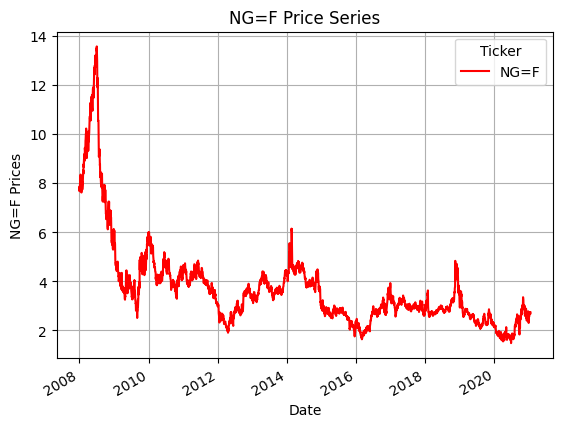

In [8]:
# ----------------- Plot Closing Prices Over Time -----------------

plt.figure(figsize=(10, 7))
data["Close"].plot(color='r')  # 'Close' column from Yahoo Finance data
plt.ylabel(f"{stocks} Prices")       # Y-axis label with stock code
plt.title(f"{stocks} Price Series")  # Title with stock code
plt.grid(True)
plt.show()



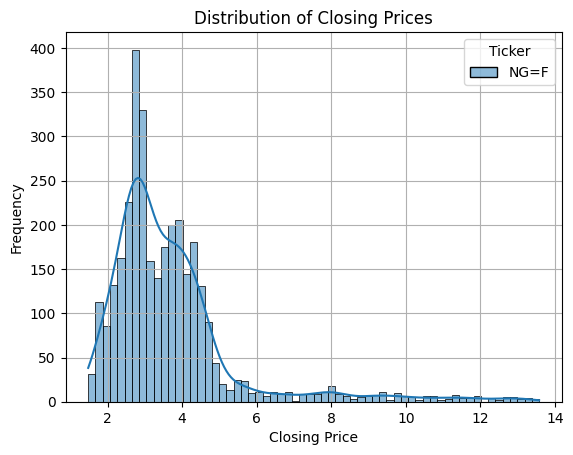

In [9]:
# Plot the distribution of 'Close' prices
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data["Close"], kde=True, color='skyblue')
plt.title("Distribution of Closing Prices")
plt.xlabel("Closing Price")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


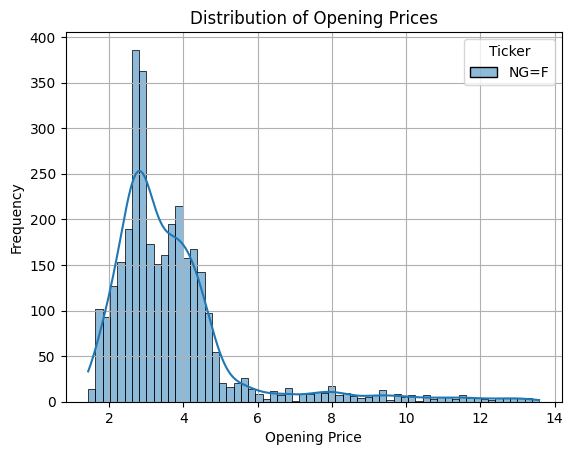

In [10]:
# Plot the distribution of 'Open' prices
sns.histplot(data["Open"], kde=True, color='lightgreen')
plt.title("Distribution of Opening Prices")
plt.xlabel("Opening Price")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


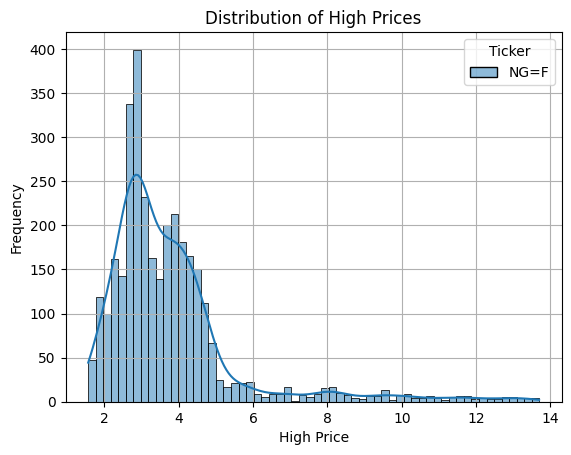

In [11]:
# Plot the distribution of 'High' prices
sns.histplot(data["High"], kde=True, color='skyblue')
plt.title("Distribution of High Prices")
plt.xlabel("High Price")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [12]:
# Set X as all columns except the target column 'Close'
X = data.drop("Close", axis=1)

# Set y as the target column 'Close' (what we want to predict)
y = data["Close"]

# Import the train-test split function
from sklearn.model_selection import train_test_split

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Print shape (rows, columns) of training features
print("X_train shape:", X_train.shape)

# Print shape of test features
print("X_test shape:", X_test.shape)

# Print shape of training labels
print("y_train shape:", y_train.shape)

# Print shape of test labels
print("y_test shape:", y_test.shape)


X_train shape: (2625, 4)
X_test shape: (657, 4)
y_train shape: (2625, 1)
y_test shape: (657, 1)


In [13]:
# Import Linear Regression model
from sklearn.linear_model import LinearRegression

# Create linear regression model object
lr = LinearRegression()

# Train the model on the training data
lr.fit(X_train, y_train)

# Predict stock prices on the test set using the trained model
pred1 = lr.predict(X_test)



In [14]:
# Import performance evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

# Define a function to calculate and print MSE, RMSE, and R² score
def calculate_metrics(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)       # Mean Squared Error
    rmse = np.sqrt(mse)                            # Root Mean Squared Error
    r2_scors = r2_score(y_test, y_pred)            # R² score
    print("MSE:- ", mse)
    print("RMSE:- ", rmse)
    print("R2_score:- ", r2_scors)

# Evaluate performance of the linear regression model
calculate_metrics(y_test, pred1)


MSE:-  0.0015345662928707832
RMSE:-  0.0391735407242029
R2_score:-  0.9994383299702766


In [15]:
# Import regularized regression models
from sklearn.linear_model import Lasso, Ridge

# Train a Lasso Regression model (L1 regularization)
la = Lasso().fit(X_train, y_train)

# Train a Ridge Regression model (L2 regularization)
ri = Ridge().fit(X_train, y_train)

# Make predictions using Lasso
la_p = la.predict(X_test)

# Make predictions using Ridge
ri_p = ri.predict(X_test)


# 📌 Interpretation
# 🔹 Lasso Regression
# Performs very poorly in this case.

# Likely zeroed out or shrank one or more important coefficients (due to L1 regularization).

# R² of ~0.12 means it explains only 12% of the variation in stock prices — not good.

# 🔹 Ridge Regression
# Performs almost as well as plain Linear Regression.

# Slightly more stable in case of multicollinearity (high correlation between features).

# R² of ~0.9914 is excellent.

# ✅ Conclusion
# Linear Regression is your best model.

# Ridge Regression is a great backup — slightly more robust.

# Lasso Regression is not suitable here; maybe the regularization strength (alpha) needs tuning, or it’s just not the right choice for this dataset.



In [16]:
# Evaluate Lasso model
calculate_metrics(y_test, la_p)


MSE:-  0.23691794405836028
RMSE:-  0.4867421741110588
R2_score:-  0.9132851351554736


In [17]:
# Evaluate Ridge model
calculate_metrics(y_test, ri_p)


MSE:-  0.0016151026199611599
RMSE:-  0.04018833935311535
R2_score:-  0.999408852689666


[*********************100%***********************]  1 of 1 completed



Shape of the data: (3282, 5)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3282 entries, 2008-01-02 to 2021-01-15
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, NG=F)   3282 non-null   float64
 1   (High, NG=F)    3282 non-null   float64
 2   (Low, NG=F)     3282 non-null   float64
 3   (Open, NG=F)    3282 non-null   float64
 4   (Volume, NG=F)  3282 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 153.8 KB

Statistical Summary:
 Price         Close         High          Low         Open         Volume
Ticker         NG=F         NG=F         NG=F         NG=F           NG=F
count   3282.000000  3282.000000  3282.000000  3282.000000    3282.000000
mean       3.707074     3.787288     3.635038     3.713705  131397.603595
std        1.825297     1.865744     1.789584     1.830425   54393.040171
min        1.482000     1.567000     1.432000     1.441000       0.000000
25%        2

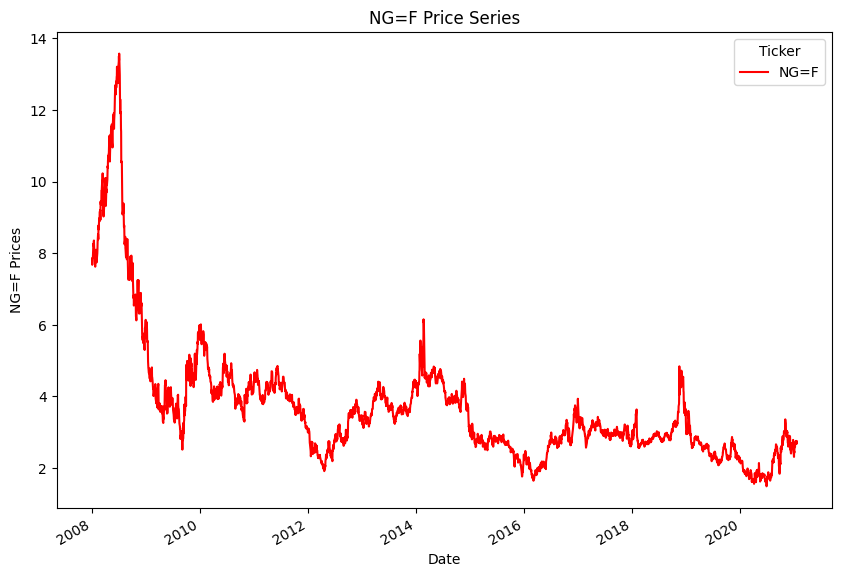

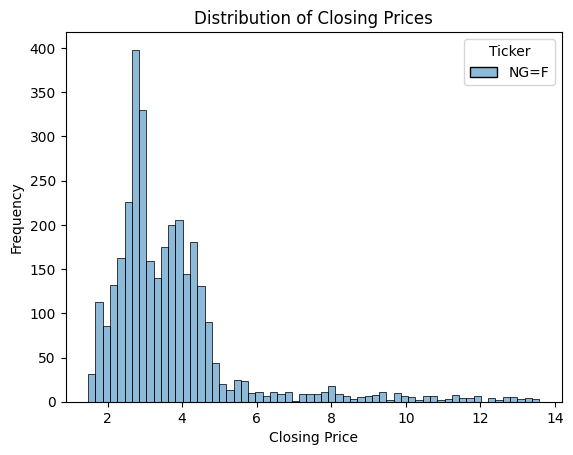

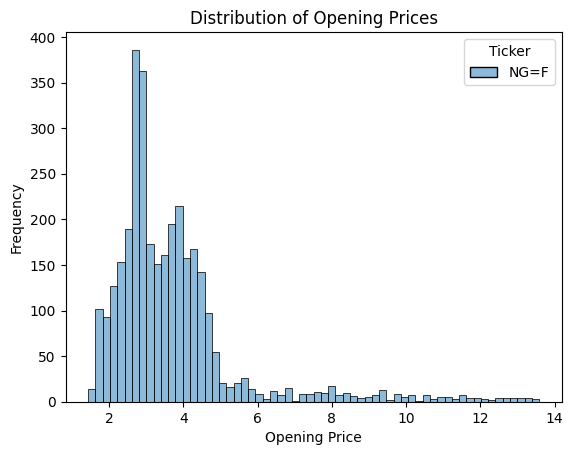

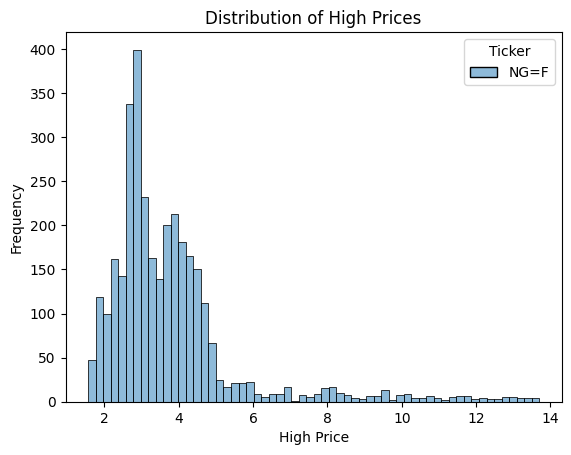


Training Features Shape: (2625, 4)
Test Features Shape: (657, 4)
Training Labels Shape: (2625, 1)
Test Labels Shape: (657, 1)

Linear Regression Metrics:
MSE:-  0.0015345662928707832
RMSE:-  0.0391735407242029
R2_score:-  0.9994383299702766

Ridge Regression Metrics:
MSE:-  0.0016151026199611599
RMSE:-  0.04018833935311535
R2_score:-  0.999408852689666

Lasso Regression Metrics:
MSE:-  0.23691794405836028
RMSE:-  0.4867421741110588
R2_score:-  0.9132851351554736


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam


SVR Metrics:
MSE:-  0.0019611113574962355
RMSE:-  0.04428443696713593
R2_score:-  0.9992822092603147


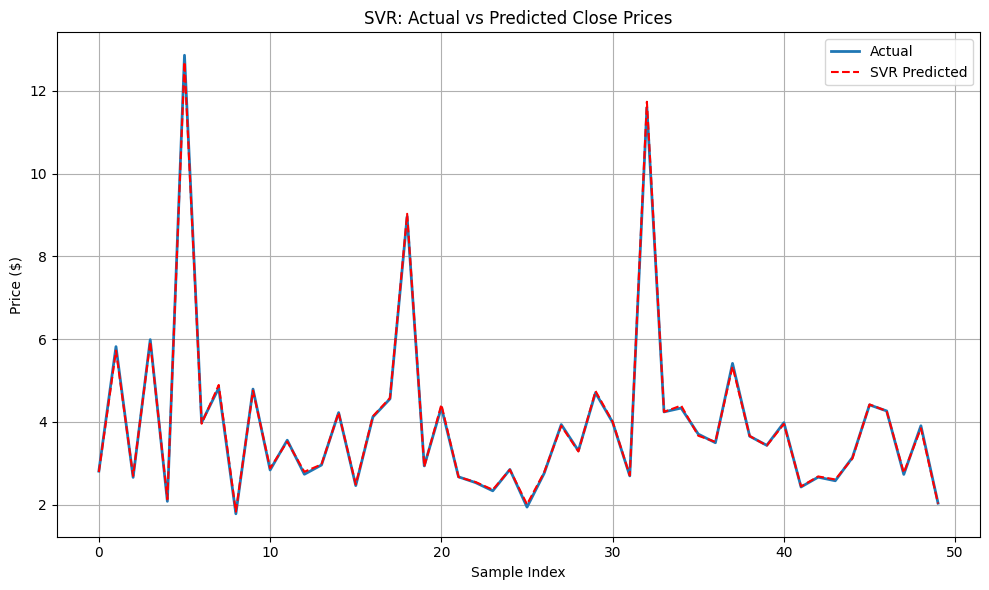

Enter date (YYYY-MM-DD): 2020-12-22
Enter Opening Price: 2.7799999713897705
Enter High Price: 2.805999994277954	
Enter Low Price: 2.690000057220459
Enter Volume: 112742

📅 Date: 2020-12-22
🔍 Predicted Closing Price (SVR): $2.84
✅ Actual Closing Price: $2.78
📉 Difference: +0.06


In [23]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# 1. Download NG=F data (4 Jul 2024 – 4 Jul 2025)
stocks = "NG=F"
data = yf.download(stocks, start="2008-01-01", end="2021-01-18", auto_adjust=True)
data.dropna(inplace=True)

# 2. Show total number of rows and columns
print("\nShape of the data:", data.shape)

# 3. Show column data types and null values
data.info()

# 4. Show statistical summary
print("\nStatistical Summary:\n", data.describe())

# 5. Plot the closing prices of the stock over time
data.Close.plot(figsize=(10, 7), color='r')
plt.ylabel(f"{stocks} Prices")
plt.title(f"{stocks} Price Series")
plt.show()

# 6. Plot distributions
sns.histplot(data["Close"])
plt.title("Distribution of Closing Prices")
plt.xlabel("Closing Price")
plt.ylabel("Frequency")
plt.show()

sns.histplot(data["Open"])
plt.title("Distribution of Opening Prices")
plt.xlabel("Opening Price")
plt.ylabel("Frequency")
plt.show()

sns.histplot(data["High"])
plt.title("Distribution of High Prices")
plt.xlabel("High Price")
plt.ylabel("Frequency")
plt.show()

# 7. Prepare features and target
X = data.drop("Close", axis=1)
y = data["Close"]

# 8. Train–test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("\nTraining Features Shape:", X_train.shape)
print("Test Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Test Labels Shape:", y_test.shape)

# 9. Train Linear, Ridge, and Lasso models
lr = LinearRegression().fit(X_train, y_train)
ri = Ridge().fit(X_train, y_train)
la = Lasso().fit(X_train, y_train)

# 10. Predict using trained models
pred_lr = lr.predict(X_test)
pred_ri = ri.predict(X_test)
pred_la = la.predict(X_test)

# 11. Define evaluation function
def calculate_metrics(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2_scors = r2_score(y_test, y_pred)
    print("MSE:- ", mse)
    print("RMSE:- ", rmse)
    print("R2_score:- ", r2_scors)

# 12. Evaluate models
print("\nLinear Regression Metrics:")
calculate_metrics(y_test, pred_lr)

print("\nRidge Regression Metrics:")
calculate_metrics(y_test, pred_ri)

print("\nLasso Regression Metrics:")
calculate_metrics(y_test, pred_la)

# 13. SVR with GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=0)
grid.fit(X_train_scaled, y_train)

# Best estimator from grid search
svr = grid.best_estimator_
y_pred_svr = svr.predict(X_test_scaled)

print("\nSVR Metrics:")
calculate_metrics(y_test, y_pred_svr)

# 14. Visual comparison (first 50 samples)
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:50], label='Actual', linewidth=2)
plt.plot(y_pred_svr[:50], label='SVR Predicted', linestyle='--', color='red')
plt.title('SVR: Actual vs Predicted Close Prices')
plt.xlabel('Sample Index')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 15. Predict from user input
date_str = input("Enter date (YYYY-MM-DD): ")
open_ = float(input("Enter Opening Price: "))
high = float(input("Enter High Price: "))
low = float(input("Enter Low Price: "))
volume = float(input("Enter Volume: "))

input_array = np.array([[open_, high, low, volume]])
input_scaled = scaler.transform(input_array)
predicted_price = svr.predict(input_scaled)[0]

# 16. Get actual close from date if available
try:
    actual_price = data.loc[date_str, "Close"]
    if hasattr(actual_price, 'iloc'):
        actual_price = actual_price.iloc[0]
    print(f"\n📅 Date: {date_str}")
    print(f"🔍 Predicted Closing Price (SVR): ${predicted_price:.2f}")
    print(f"✅ Actual Closing Price: ${actual_price:.2f}")
    print(f"📉 Difference: {predicted_price - actual_price:+.2f}")
except KeyError:
    print("\n⚠️ Actual data not available for this date (market closed or out of range).")



In [24]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime

# 1. Download NG=F data (4 Jul 2024 – 4 Jul 2025)
data = yf.download("NG=F", start="2024-07-04", end="2025-07-05", auto_adjust=True)
data.dropna(inplace=True)

# 2. Prepare features and target
X = data[["Open", "High", "Low", "Volume"]]
y = data[["Close"]]

# 3. Train–test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Train SVR with GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}
grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=0)
grid.fit(X_train_scaled, y_train.values.ravel())
svr = grid.best_estimator_
svr.fit(X_train_scaled, y_train.values.ravel())

# 6. Get custom input and associated date
date_str = input("Enter date (YYYY-MM-DD): ")
open_ = float(input("Enter Opening Price: "))
high = float(input("Enter High Price: "))
low = float(input("Enter Low Price: "))
volume = float(input("Enter Volume: "))

# 7. Predict closing price using model
input_array = np.array([[open_, high, low, volume]])
input_scaled = scaler.transform(input_array)
predicted_price = svr.predict(input_scaled)[0]

# 8. Find actual closing price on that date from downloaded data
try:
    actual_price = data.loc[date_str, "Close"]
except KeyError:
    actual_price = None

# 9. Output results
print("\n📅 Date:", date_str)
print(f"🔍 Predicted Closing Price: ${predicted_price:.2f}")
if actual_price is not None:
    actual_value = actual_price.iloc[0] if hasattr(actual_price, 'iloc') else actual_price
    print(f"✅ Actual Closing Price:    ${actual_value:.2f}")
    diff = predicted_price - actual_value
    print(f"📉 Difference (Predicted − Actual): {diff:+.2f}")

    # 10. Plot curve of predicted vs actual with date
    all_preds = svr.predict(scaler.transform(X))
    data_plot = data.copy()
    data_plot['Predicted_Close'] = all_preds

    plt.figure(figsize=(12, 6))
    plt.plot(data_plot.index, data_plot['Close'], label='Actual Closing Price', linewidth=2)
    plt.plot(data_plot.index, data_plot['Predicted_Close'], label='Predicted Closing Price', linestyle='--', color='red')
    plt.title('SVR Model: Actual vs Predicted Closing Prices')
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Actual data not available for this date (market closed or out of range).")

# Although the user input (e.g. 2025-02-21) is used only for a single prediction, the plot we added at the end of the SVR code shows the entire dataset's actual vs. predicted values.

# ✅ Here's why and how it works:
# 1. User Input Section (your single date):
# You enter 1 date + 4 values (Open, High, Low, Volume), and the model predicts only 1 closing price for that input.

# 2. Full Dataset Plot:
# Separately, we use the trained SVR model to predict all test data (in X_test) to evaluate the model performance. That is:

# python
# Copy code
# y_pred = svr.predict(X_test_scaled)
# Then we plot:

# python
# Copy code
# plt.plot(y_test.index, y_test, label='Actual')
# plt.plot(y_test.index, y_pred, label='Predicted')
# So even though the user only inputs one set of values manually, the model has already predicted prices for the full test set behind the scenes, which we then use for visual evaluation.

[*********************100%***********************]  1 of 1 completed


Enter date (YYYY-MM-DD): 2020-12-22
Enter Opening Price: 2.7799999713897705
Enter High Price: 2.805999994277954
Enter Low Price: 2.690000057220459
Enter Volume: 112742

📅 Date: 2020-12-22
🔍 Predicted Closing Price: $2.70
⚠️ Actual data not available for this date (market closed or out of range).
